In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing The Models in Sciket-Learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR


# Importing Usefull Operators in Sciket-Learn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("/kaggle/input/employee-performance-prediction/train_dataset.csv")

In [4]:
data.shape

(1017, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1017 non-null   int64  
 1   targeted_productivity  1017 non-null   float64
 2   smv                    1017 non-null   float64
 3   wip                    594 non-null    float64
 4   over_time              1017 non-null   int64  
 5   incentive              1017 non-null   int64  
 6   idle_time              1017 non-null   float64
 7   idle_men               1017 non-null   int64  
 8   no_of_style_change     1017 non-null   int64  
 9   no_of_workers          1017 non-null   float64
 10  month                  1017 non-null   int64  
 11  quarter_Quarter1       1017 non-null   int64  
 12  quarter_Quarter2       1017 non-null   int64  
 13  quarter_Quarter3       1017 non-null   int64  
 14  quarter_Quarter4       1017 non-null   int64  
 15  quar

In [7]:
data.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_finishing ', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'actual_productivity'],
      dtype='object')

In [74]:
data.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
0,9,0.75,3.94,NaN,960,0,0.00,0,0,8.00,...,1,0,0,0,0,0,0,0,1,0.76
1,7,0.65,30.10,909.00,7080,0,0.00,0,1,59.00,...,0,0,1,0,0,0,1,0,0,0.54
2,3,0.80,4.15,NaN,1440,0,0.00,0,0,7.00,...,0,1,0,0,0,0,0,0,1,0.82
3,1,0.65,22.53,762.00,5040,0,0.00,0,1,42.00,...,0,0,1,0,0,0,0,0,1,0.58
4,4,0.70,30.10,767.00,3300,50,0.00,0,1,57.00,...,0,0,1,1,0,0,0,0,0,0.79


In [76]:
data.isnull().sum()

team                       0
targeted_productivity      0
smv                        0
wip                      423
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
month                      0
quarter_Quarter1           0
quarter_Quarter2           0
quarter_Quarter3           0
quarter_Quarter4           0
quarter_Quarter5           0
department_finishing       0
department_finishing       0
department_sweing          0
day_Monday                 0
day_Saturday               0
day_Sunday                 0
day_Thursday               0
day_Tuesday                0
day_Wednesday              0
actual_productivity        0
dtype: int64

In [77]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
count,1017.00,1017.00,1017.00,594.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,...,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00
mean,6.44,0.73,15.15,1183.18,4532.94,40.69,0.56,0.40,0.16,34.85,...,0.20,0.21,0.58,0.16,0.15,0.16,0.17,0.17,0.19,0.74
std,3.47,0.10,10.95,1793.84,3276.00,173.24,10.09,3.35,0.44,22.19,...,0.40,0.41,0.49,0.37,0.36,0.37,0.37,0.38,0.39,0.17
min,1.00,0.07,2.90,7.00,0.00,0.00,0.00,0.00,0.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23
25%,3.00,0.70,3.94,770.50,1440.00,0.00,0.00,0.00,0.00,9.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.65
50%,7.00,0.75,15.26,1039.00,4080.00,0.00,0.00,0.00,0.00,34.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.77
75%,9.00,0.80,24.26,1254.75,6900.00,50.00,0.00,0.00,0.00,57.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.85
max,12.00,0.80,54.56,23122.00,15120.00,3600.00,270.00,45.00,2.00,89.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.11


# **Replacing the missing values with mean**

In [78]:
data["wip"]=data["wip"].fillna(data["wip"].mean()) 

# Checking for the distribution of data

[Text(0.5, 1.0, 'Actual productivity gained in general')]

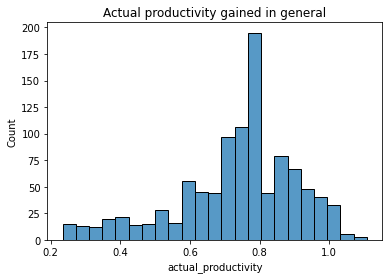

In [79]:
# In order to guage maximum productivity in actual
sns.histplot(data['actual_productivity'], kde=False).set(title="Actual productivity gained in general")

# Checking for the correlation

<AxesSubplot:>

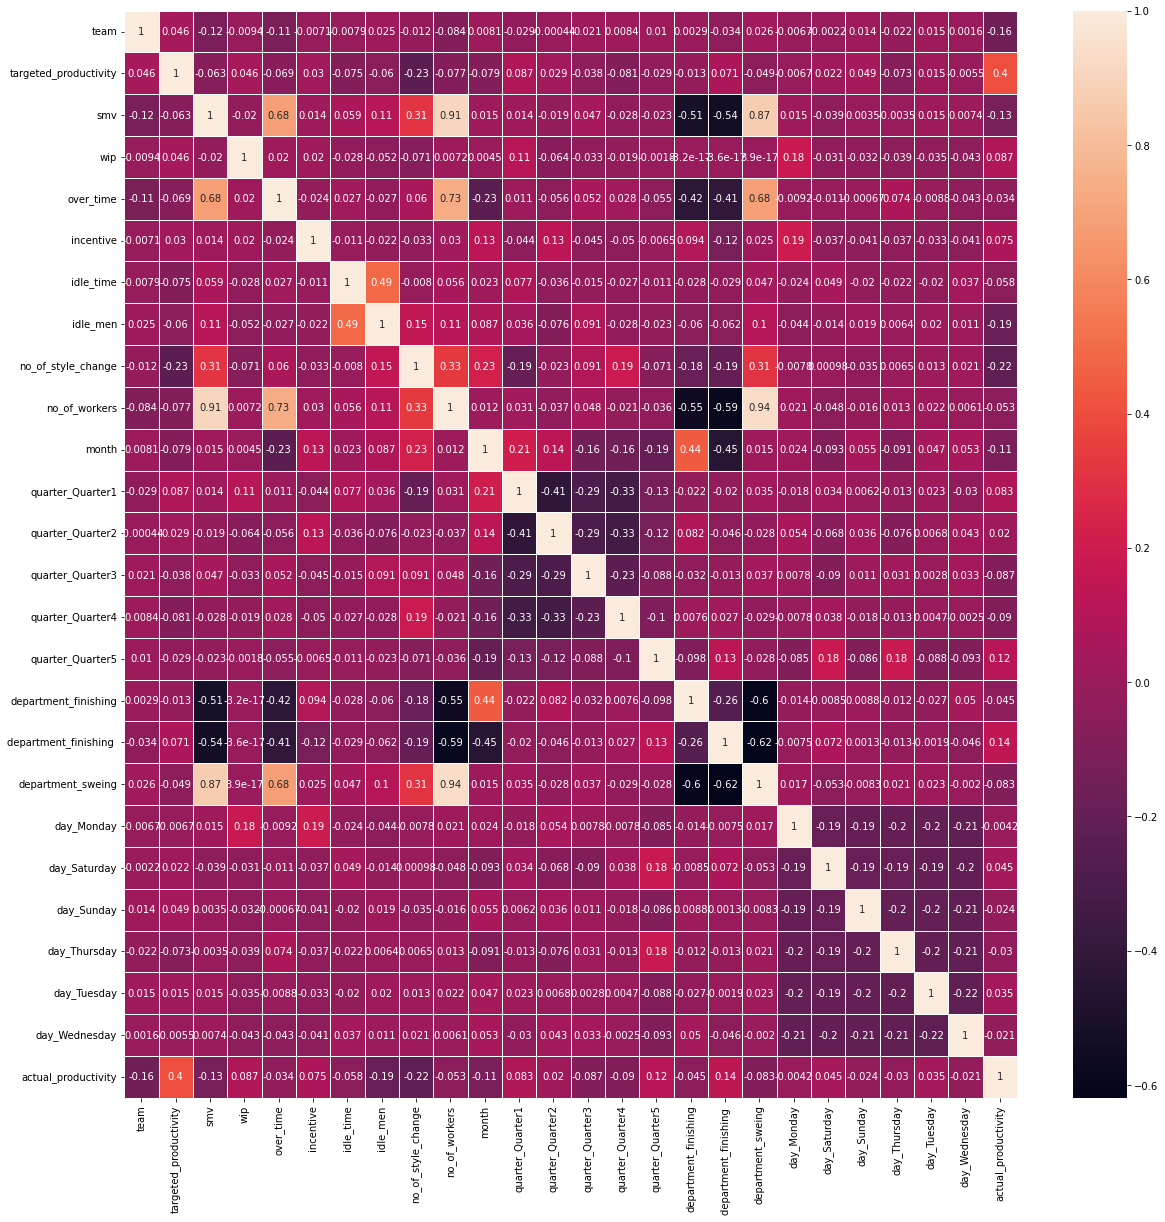

In [80]:
corrMatrix = data.corr()
fig, ax = plt.subplots(figsize=(20,20)) # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)

# Convert correlation matrix to 1-D Series and sort

In [41]:
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corrMatrix.unstack().sort_values()
pd.set_option('display.max_rows', None) 
sorted_mat.tail(100)

quarter_Quarter1       actual_productivity      0.082608
actual_productivity    quarter_Quarter1         0.082608
                       wip                      0.082943
wip                    actual_productivity      0.082943
month                  idle_men                 0.086587
idle_men               month                    0.086587
quarter_Quarter1       targeted_productivity    0.086722
targeted_productivity  quarter_Quarter1         0.086722
quarter_Quarter3       idle_men                 0.090700
idle_men               quarter_Quarter3         0.090700
quarter_Quarter3       no_of_style_change       0.090840
no_of_style_change     quarter_Quarter3         0.090840
department_finishing   incentive                0.094254
incentive              department_finishing     0.094254
department_sweing      idle_men                 0.100313
idle_men               department_sweing        0.100313
wip                    quarter_Quarter1         0.110358
quarter_Quarter1       wip     

# Features and Label Selection

In [43]:
X= data.iloc[:,:-1]
y = data["actual_productivity"]

In [44]:
X.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,9,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,...,0,1,0,0,0,0,0,0,0,1
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59.0,...,0,0,0,1,0,0,0,1,0,0
2,3,0.80,4.15,1039.0,1440,0,0.0,0,0,7.0,...,0,0,1,0,0,0,0,0,0,1
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42.0,...,0,0,0,1,0,0,0,0,0,1
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,...,0,0,0,1,1,0,0,0,0,0


In [45]:
y.head()

0    0.755167
1    0.535678
2    0.820833
3    0.581131
4    0.790003
Name: actual_productivity, dtype: float64

In [48]:
X.shape

(1017, 25)

In [49]:
y.shape

(1017,)

In [50]:
X.isnull().sum()

team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
month                    0
quarter_Quarter1         0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_finishing     0
department_finishing     0
department_sweing        0
day_Monday               0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
dtype: int64

# ***Algorithms***

In [51]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
knr = KNeighborsRegressor()
rfr = RandomForestRegressor()
svr = SVR()

In [52]:
for clf in (lr,knr, dtr,rfr,svr ):
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print("R2 Scored of ", clf.__class__.__name__, r2_score(y_pred, y))

R2 Scored of  LinearRegression -1.2265606808057035
R2 Scored of  KNeighborsRegressor -0.31603203868527263
R2 Scored of  DecisionTreeRegressor 1.0
R2 Scored of  RandomForestRegressor 0.8981597538070434
R2 Scored of  SVR -15.90606250171276


> R2 score showed the following order of models as per their effectiveness.

> DecisionTreeRegressor (1.0) > RandomForestRegressor 0.90 >KNeighborsRegressor -0.34 > KNeighborsRegressor -0.34

**Mean Squared Error of the algorithms**

In [54]:
from sklearn.metrics import mean_squared_error  ,r2_score
for clf in (lr,knr, dtr,rfr,svr ):
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print("Mean Square Error of ", clf.__class__.__name__, mean_squared_error(y_pred, y))

Mean Square Error of  LinearRegression 0.02094504591376525
Mean Square Error of  KNeighborsRegressor 0.016658493792401103
Mean Square Error of  DecisionTreeRegressor 3.0057384540131965e-33
Mean Square Error of  RandomForestRegressor 0.002232880241834118
Mean Square Error of  SVR 0.028620668946333333


From the above code
- It can be seen that the Random forest Regressor is the most suitable with the least MSE value of 0.0021. 